In [112]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split


In [113]:
df = pd.read_csv("~/dev/gachon-ai/datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [114]:
df = df.drop("Outcome", axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [115]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [132]:
y = df["BMI"]
X = df.drop("BMI", axis=1)

y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
y.shape

(768, 248)

In [117]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [118]:
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [120]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 8)                 64        
                                                                 
 dense_33 (Dense)            (None, 30)                270       
                                                                 
 dense_34 (Dense)            (None, 30)                930       
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [121]:
N_EPOCHS = 60
history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# y_test_class = np.argmax(y_test)
# y_pred_class = np.argmax(y_pred)

Epoch 1/60
20/20 [==============================] - 0s 4ms/step - loss: 240.9570 - mse: 240.9570 - val_loss: 7.9426 - val_mse: 7.9426
Epoch 2/60
20/20 [==============================] - 0s 1ms/step - loss: 4.3527 - mse: 4.3527 - val_loss: 2.0089 - val_mse: 2.0089
Epoch 3/60
20/20 [==============================] - 0s 1ms/step - loss: 2.1770 - mse: 2.1770 - val_loss: 1.7216 - val_mse: 1.7216
Epoch 4/60
20/20 [==============================] - 0s 1ms/step - loss: 1.8920 - mse: 1.8920 - val_loss: 7.1660 - val_mse: 7.1660
Epoch 5/60
20/20 [==============================] - 0s 1ms/step - loss: 2.9011 - mse: 2.9011 - val_loss: 5.8768 - val_mse: 5.8768
Epoch 6/60
20/20 [==============================] - 0s 1ms/step - loss: 2.6684 - mse: 2.6684 - val_loss: 0.3565 - val_mse: 0.3565
Epoch 7/60
20/20 [==============================] - 0s 1ms/step - loss: 1.7851 - mse: 1.7851 - val_loss: 0.8434 - val_mse: 0.8434
Epoch 8/60
20/20 [==============================] - 0s 1ms/step - loss: 1.3448 - mse: 

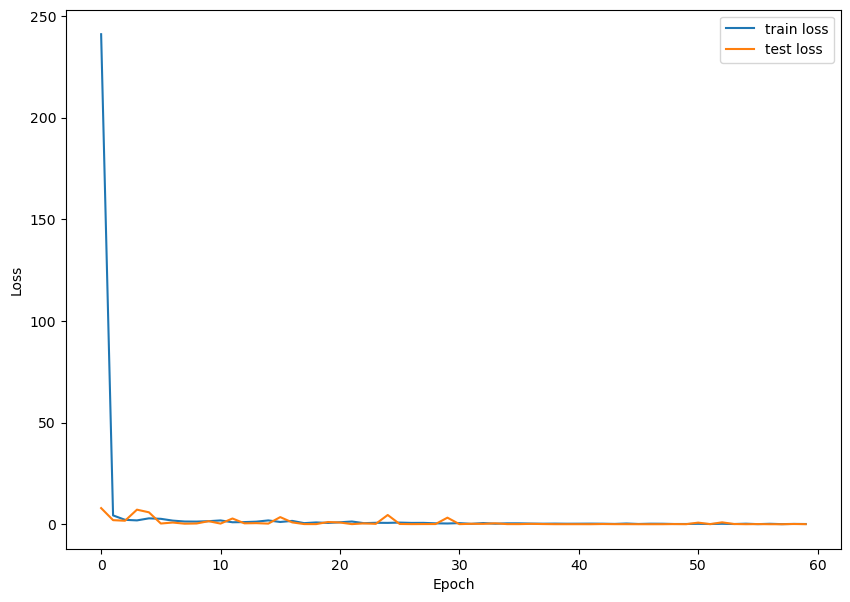

In [122]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()